**<center> <span style="color:#0F52BA;font-family:serif; font-size:32px;"> Exploratory Analysis of Students Exam Performance Data</span> </center>**

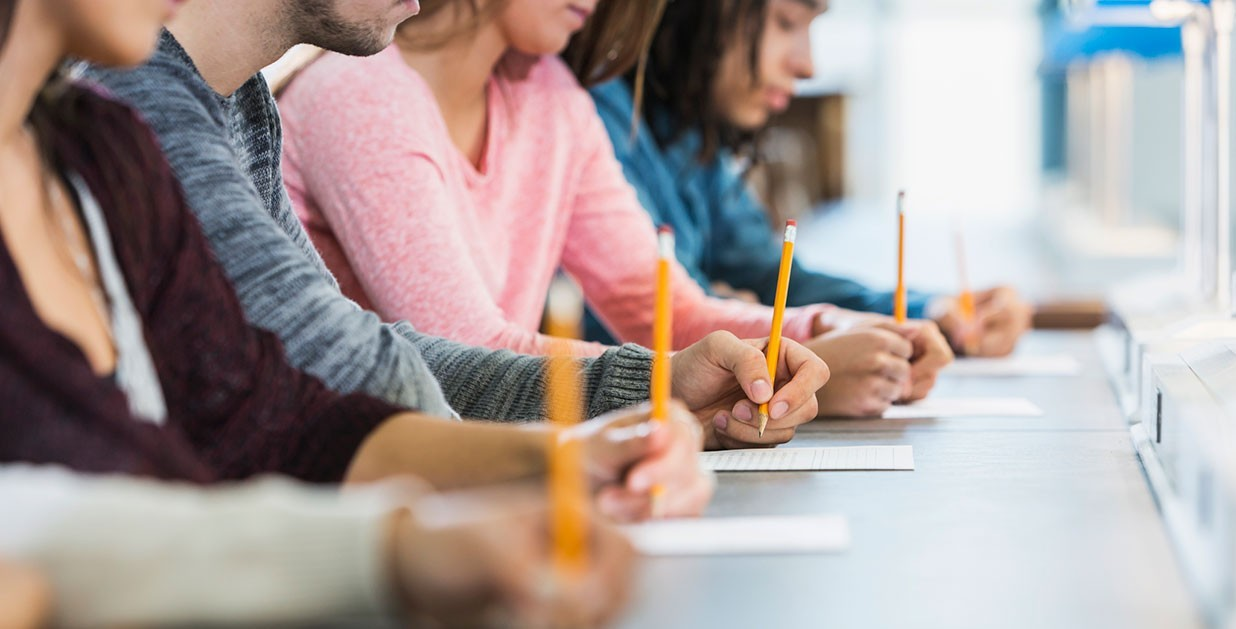

## Introduction

This data set is downloaded from https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977&sortBy=voteCount and consists of the marks secured by US high school students in various subjects.

We try to know which factors may affect the student's performance, such as parental educational background, test preparation, etc.

The independent variables are as follows:

* gender: the sex of the students

* race/ethnicity: students' race or ethnicity

* parental education level: the parents' final education

* lunch: having lunch before a test (normal or abnormal)

* test preparation course: completed or uncompleted test preparation course 

## Importing required packages

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('deep')

import warnings
warnings.filterwarnings('ignore') 

## Loading data into DataFrame

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df_copy = df.copy(deep=True)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


## Data Pre-processing

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
print(df.shape)

(1000, 8)


Total record in dataset = 1000<br>
Columns in the dataset = 8

In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

There is no missing or duplicated values.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]
pd.DataFrame(dict, index=["unique count"]).transpose()

,unique count
gender,2
race/ethnicity,5
parental_level_of_education,6
lunch,2
test_preparation_course,2
math_score,81
reading_score,72
writing_score,77


Number of unique values.

## Univariate Analysis

### Gender of students

In [10]:
pd.DataFrame(df['gender'].value_counts())

,gender
female,518
male,482


Number of students by gender.

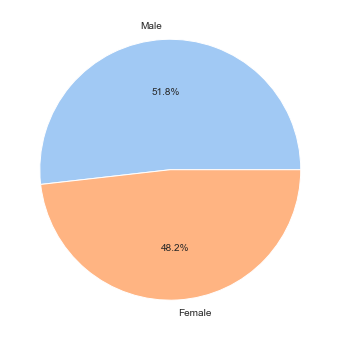

In [11]:
plt.figure(figsize=[12,6])
plt.pie(x=df['gender'].value_counts(), labels=['Male','Female'], 
        autopct='%1.1f%%', colors=sns.color_palette('pastel'));

The number of female students is slightly higher than male students: 51.8% and 48.2%, respectively.

### Race/ethnicity of students

In [12]:
pd.DataFrame(df['race/ethnicity'].value_counts())

,race/ethnicity
group C,319
group D,262
group B,190
group E,140
group A,89


Number of students by race or ethnicity.

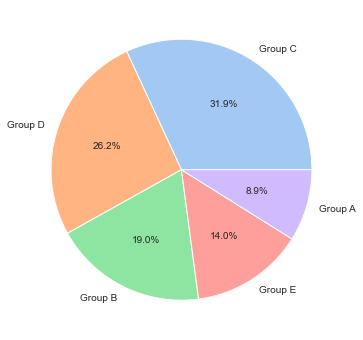

In [13]:
plt.figure(figsize=[12,6])
plt.pie(x=df['race/ethnicity'].value_counts(), 
        labels=['Group C', 'Group D', 'Group B','Group E','Group A'], 
        autopct='%1.1f%%', colors = sns.color_palette('pastel'));

Groups C and D are the biggest groups, while Group A has the smallest number of representatives.

###  Education level of parents

In [14]:
pd.DataFrame(df['parental_level_of_education'].value_counts())

,parental_level_of_education
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


Number of students by level of parents education.

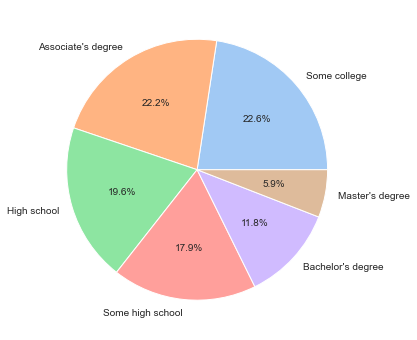

In [15]:
plt.figure(figsize=[12,6])
plt.pie(x=df['parental_level_of_education'].value_counts(), 
        labels=["Some college", "Associate's degree", "High school", "Some high school", 
                "Bachelor's degree", "Master's degree"], 
        autopct='%1.1f%%', colors = sns.color_palette('pastel'));

The number of parents with a bachelor's or master's degree is much smaller than other categories of parents.

### Lunch

In [16]:
pd.DataFrame(df['lunch'].value_counts())

,lunch
standard,645
free/reduced,355


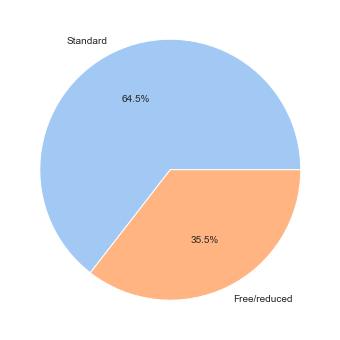

In [17]:
plt.figure(figsize=[12,6])
plt.pie(x=df['lunch'].value_counts(), labels=["Standard", 'Free/reduced'], 
        autopct='%1.1f%%', colors = sns.color_palette('pastel'));

### Test preparation for the courses

In [18]:
pd.DataFrame(df['test_preparation_course'].value_counts())

,test_preparation_course
none,642
completed,358


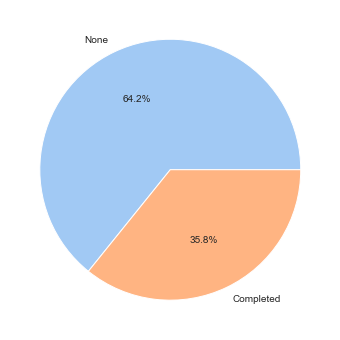

In [19]:
plt.figure(figsize=[12,6])
plt.pie(x=df['test_preparation_course'].value_counts(), 
        labels=["None", 'Completed'], 
        autopct='%1.1f%%', colors = sns.color_palette('pastel'));

Only 35.8% of students completed test preparations.

### Math score

In [20]:
pd.DataFrame(df['math_score'].describe())

,math_score
count,1000.00000
mean,66.08900
std,15.16308
min,0.00000
25%,57.00000
50%,66.00000
75%,77.00000
max,100.00000


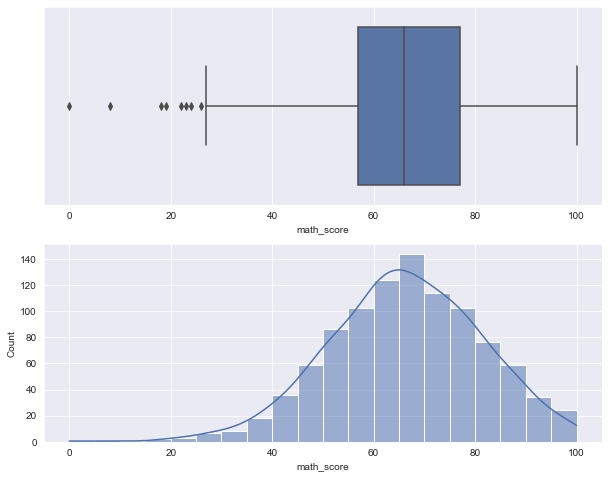

In [21]:
f, (ax_box, ax_hist) = plt.subplots(2,figsize=(10, 8))
sns.boxplot(x='math_score', data=df, ax=ax_box)
sns.histplot(x = 'math_score', data =df, bins=20, kde=True, ax=ax_hist);

The math score is skewed to the left and has some outliers. The average math score is 66.09 and the median is 66, which means they are almost equal.

### Reading score

In [22]:
pd.DataFrame(df['reading_score'].describe())

,reading_score
count,1000.000000
mean,69.169000
std,14.600192
min,17.000000
25%,59.000000
50%,70.000000
75%,79.000000
max,100.000000


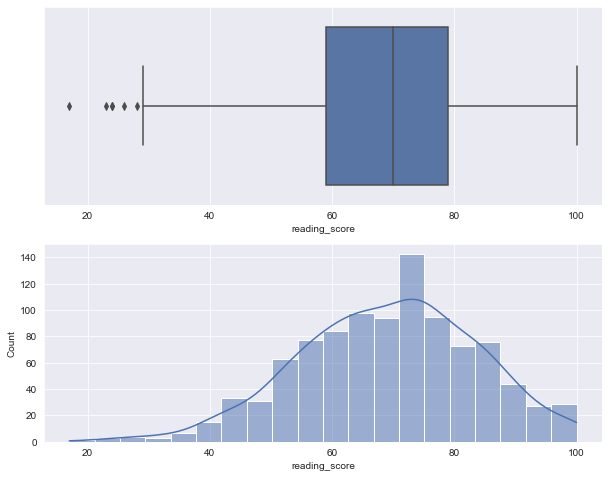

In [23]:
f, (ax_box, ax_hist) = plt.subplots(2,figsize=(10, 8))
sns.boxplot(x='reading_score', data=df, ax=ax_box)
sns.histplot(x = 'reading_score', data =df, bins=20, kde=True, ax=ax_hist);

The reading score is skewed to the left and have some outlires. Average reading score is 69.17.
The standard deviation is 14.60, which indicates that there is a small range of values that deviate from the mean. 

### Writing score

In [24]:
pd.DataFrame(df['writing_score'].describe())

,writing_score
count,1000.000000
mean,68.054000
std,15.195657
min,10.000000
25%,57.750000
50%,69.000000
75%,79.000000
max,100.000000


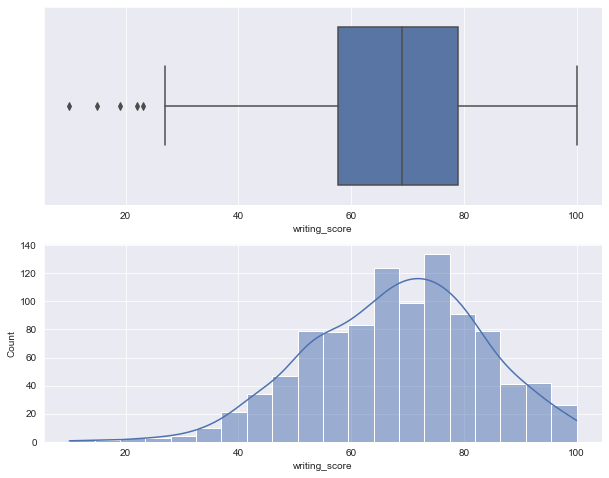

In [25]:
f, (ax_box, ax_hist) = plt.subplots(2,figsize=(10, 8))
sns.boxplot(x='writing_score', data=df, ax=ax_box)
sns.histplot(x = 'writing_score', data =df, bins=20, kde=True, ax=ax_hist);

The writing score is skewed to the left and, as usual, has some outliers. The average writing score is 68.05. The standard deviation is 15.20, which means there is a relatively small spread of values away from the mean.

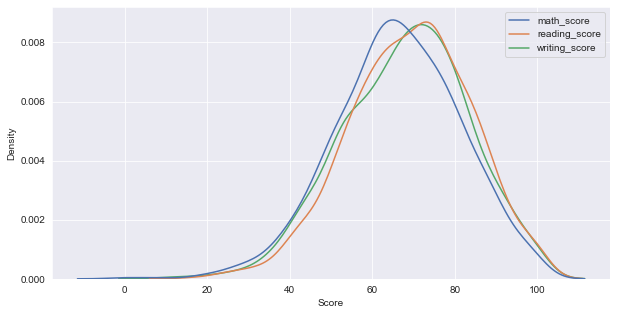

In [26]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df)
plt.xlabel('Score');

There are no big differences in all subjects' scores.

## Bivariate Analysis

### Average scores by gender

In [27]:
df.groupby('gender')[
    ['math_score', 'reading_score', 'writing_score']].mean()

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


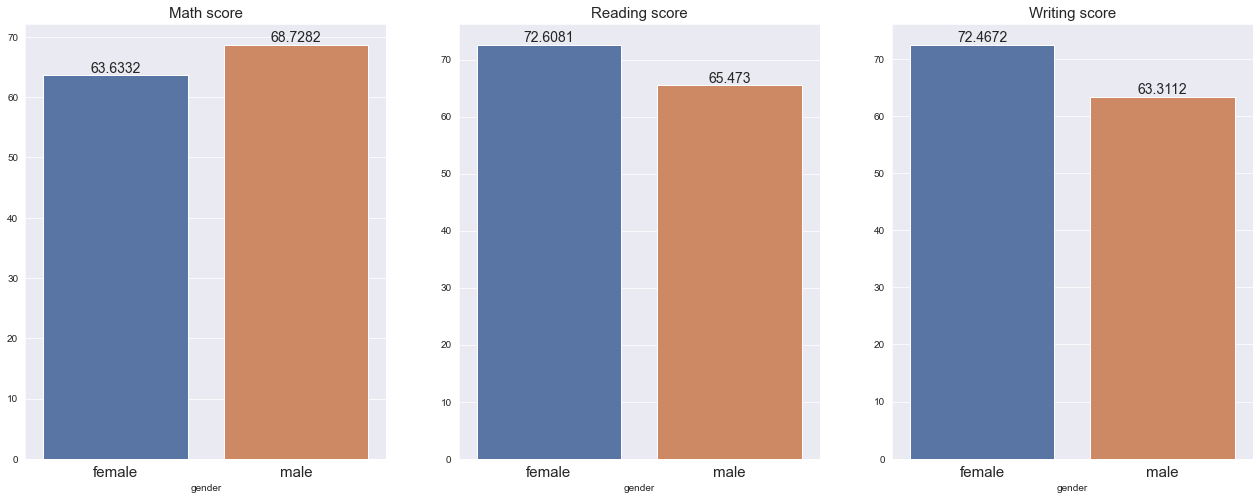

In [28]:
df1 = df.groupby('gender')

f, ax=plt.subplots(1, 3,figsize=(22,8))
sns.barplot(x=df1['math_score'].mean().index, y=df1['math_score'].mean().values, ax=ax[0])
ax[0].set_title('Math score', size=15)
ax[0].tick_params(axis='x', labelsize=15)

for container in ax[0].containers:
    ax[0].bar_label(container, size=14)

sns.barplot(x=df1['reading_score'].mean().index, y=df1['reading_score'].mean().values, ax=ax[1])
ax[1].set_title('Reading score', size=15)
ax[1].tick_params(axis='x', labelsize=15)

for container in ax[1].containers:
    ax[1].bar_label(container, size=14)

sns.barplot(x=df1['writing_score'].mean().index, y=df1['writing_score'].mean().values, ax=ax[2])
ax[2].set_title('Writing score', size=15)
ax[2].tick_params(axis='x', labelsize=15)

for container in ax[2].containers:
    ax[2].bar_label(container, size=14)

Female students are better in reading (average score 72.61) and writing (72.47), while male students have better performance in math (68.73).

### Average scores by race/ethnicity

In [29]:
df.groupby('race/ethnicity')[
    ['math_score', 'reading_score', 'writing_score']].mean().reset_index()

,race/ethnicity,math_score,reading_score,writing_score
0,group A,61.629213,64.674157,62.674157
1,group B,63.452632,67.352632,65.600000
2,group C,64.463950,69.103448,67.827586
3,group D,67.362595,70.030534,70.145038
4,group E,73.821429,73.028571,71.407143


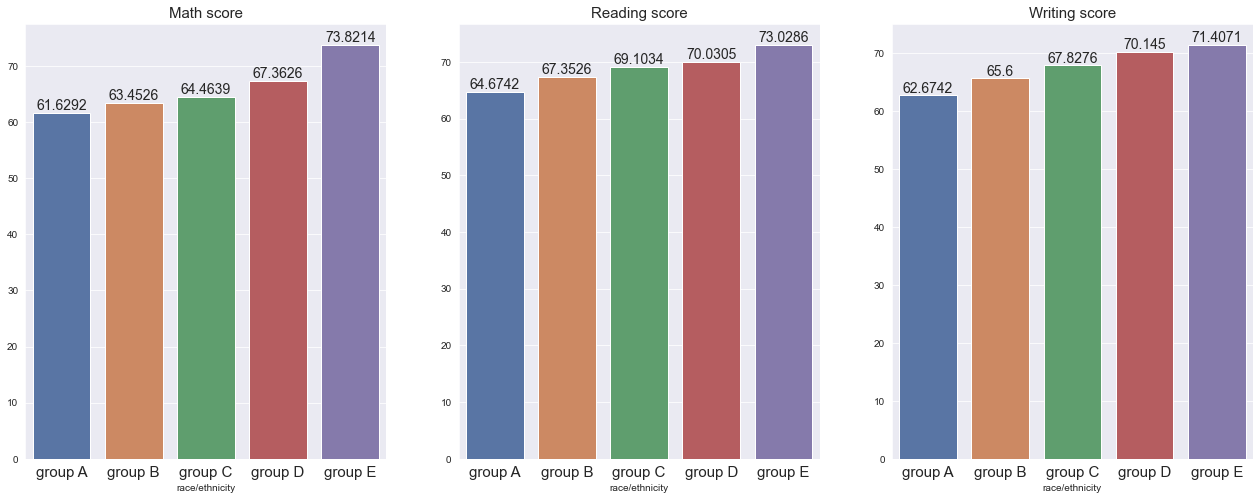

In [30]:
df2 = df.groupby('race/ethnicity')

f, ax=plt.subplots(1, 3,figsize=(22,8))
sns.barplot(x=df2['math_score'].mean().index, y=df2['math_score'].mean().values, ax=ax[0])
ax[0].set_title('Math score', size=15)
ax[0].tick_params(axis='x', labelsize=15)

for container in ax[0].containers:
    ax[0].bar_label(container, size=14)

sns.barplot(x=df2['reading_score'].mean().index, y=df2['reading_score'].mean().values, ax=ax[1])
ax[1].set_title('Reading score', size=15)
ax[1].tick_params(axis='x', labelsize=15)

for container in ax[1].containers:
    ax[1].bar_label(container, size=14)

sns.barplot(x=df2['writing_score'].mean().index, y=df2['writing_score'].mean().values, ax=ax[2])
ax[2].set_title('Writing score', size=15)
ax[2].tick_params(axis='x', labelsize=15)

for container in ax[2].containers:
    ax[2].bar_label(container, size=14)


Group E is the best group in all subjects: math-73.82, reading-73.03, and writing-71.41. Students from Group A have the worst performance. However, both groups are the smallest groups in the dataset, with 140 and 89 students, respectively.

Let's check the gender of students in Group E:

In [31]:
pd.pivot_table(df, values=df[df['race/ethnicity'].str.contains('group E')
                            ], columns='gender')

gender,female,male
math_score,63.633205,68.728216
reading_score,72.608108,65.473029
writing_score,72.467181,63.311203


The research shows the same tendency: females are good at reading and writing, while males are better at math.

### Average scores by parents education level

In [32]:
df.groupby('parental_level_of_education')[
    ['math_score', 'reading_score', 'writing_score']].mean()

,math_score,reading_score,writing_score
parental_level_of_education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


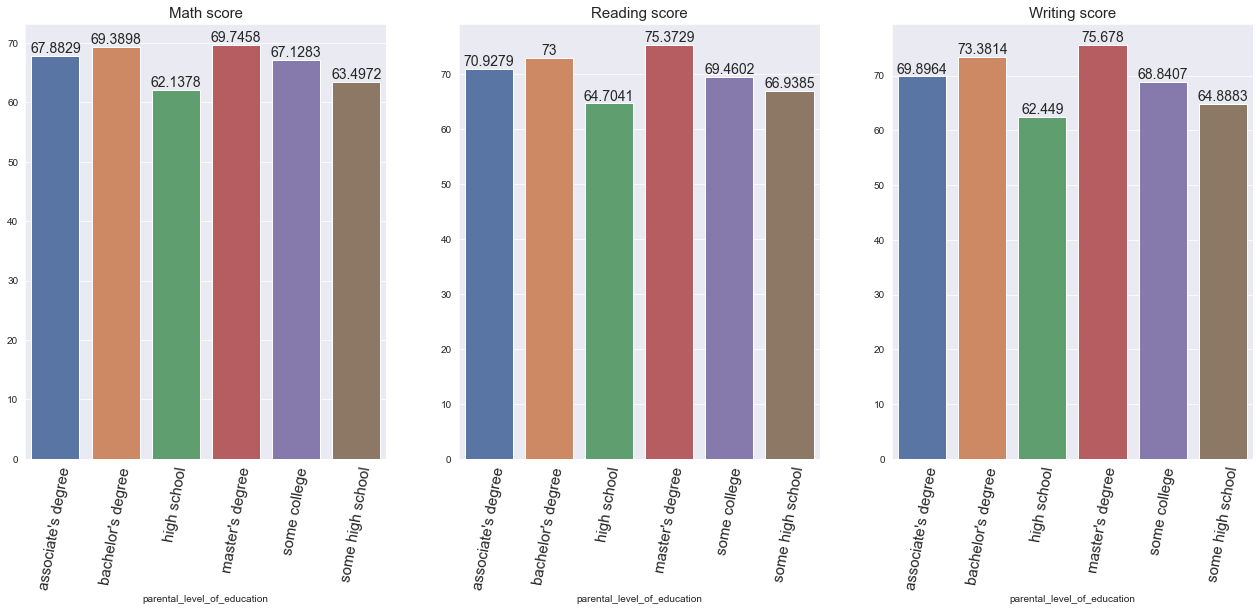

In [33]:
df3 = df.groupby('parental_level_of_education')

f, ax = plt.subplots(1, 3,figsize=(22,8))
sns.barplot(x=df3['math_score'].mean().index, y=df3['math_score'].mean().values, ax=ax[0])
ax[0].set_title('Math score', size=15)
ax[0].tick_params(axis='x', labelsize=15, rotation=80)

for container in ax[0].containers:
    ax[0].bar_label(container, size=14)

sns.barplot(x=df3['reading_score'].mean().index, y=df3['reading_score'].mean().values, ax=ax[1])
ax[1].set_title('Reading score', size=15)
ax[1].tick_params(axis='x', labelsize=15, rotation=80)

for container in ax[1].containers:
    ax[1].bar_label(container, size=14)

sns.barplot(x=df3['writing_score'].mean().index, y=df3['writing_score'].mean().values, ax=ax[2])
ax[2].set_title('Writing score', size=15)
ax[2].tick_params(axis='x', labelsize=15, rotation=80);

for container in ax[2].containers:
    ax[2].bar_label(container, size=14)

As the proverb says, the apple never falls far from the tree. Children of parents with master's degrees have the highest average scores in reading and writing! But this group has 59 students only.

### Average scores by lunch 

In [34]:
df.groupby('lunch')[['math_score', 'reading_score', 'writing_score']].mean()

,math_score,reading_score,writing_score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


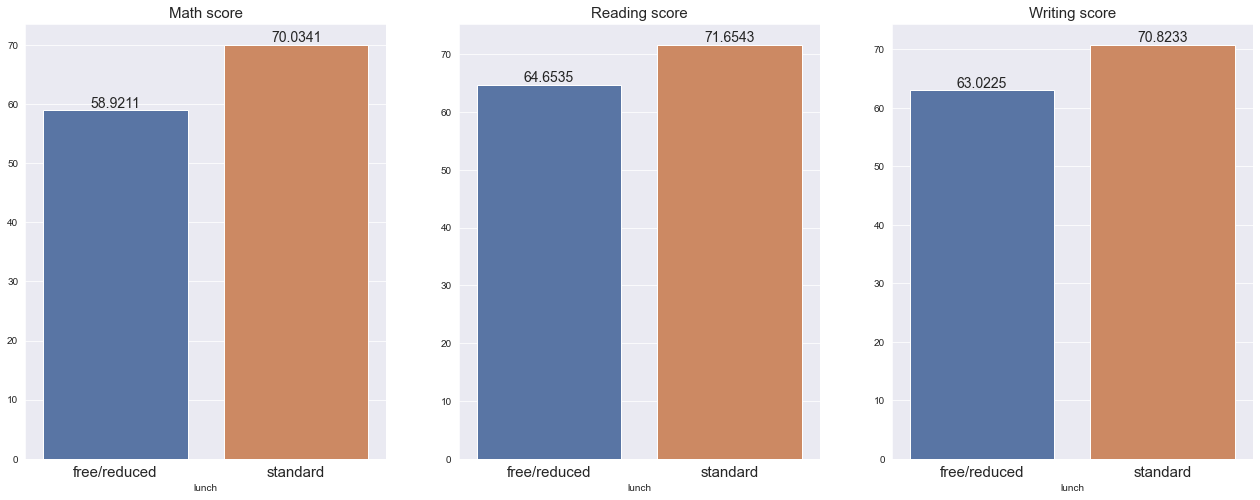

In [35]:
df4 = df.groupby('lunch')

f, ax = plt.subplots(1, 3,figsize=(22,8))
sns.barplot(x=df4['math_score'].mean().index, y=df4['math_score'].mean().values, ax=ax[0])
ax[0].set_title('Math score', size=15)
ax[0].tick_params(axis='x', labelsize=15)

for container in ax[0].containers:
    ax[0].bar_label(container, size=14)

sns.barplot(x=df4['reading_score'].mean().index, y=df4['reading_score'].mean().values, ax=ax[1])
ax[1].set_title('Reading score', size=15)
ax[1].tick_params(axis='x', labelsize=15)

for container in ax[1].containers:
    ax[1].bar_label(container, size=14)

sns.barplot(x=df4['writing_score'].mean().index, y=df4['writing_score'].mean().values, ax=ax[2])
ax[2].set_title('Writing score', size=15)
ax[2].tick_params(axis='x', labelsize=15)

for container in ax[2].containers:
    ax[2].bar_label(container, size=14)


Students with a standard lunch pack have better performance.

### Average scores by test preparations

In [36]:
df.groupby('test_preparation_course')[
    ['math_score', 'reading_score', 'writing_score']].agg(['count','mean'])

math_score            reading_score             \
                             count       mean         count       mean   
test_preparation_course                                                  
completed                      358  69.695531           358  73.893855   
none                           642  64.077882           642  66.534268   

                        writing_score             
                                count       mean  
test_preparation_course                           
completed                         358  74.418994  
none                              642  64.504673

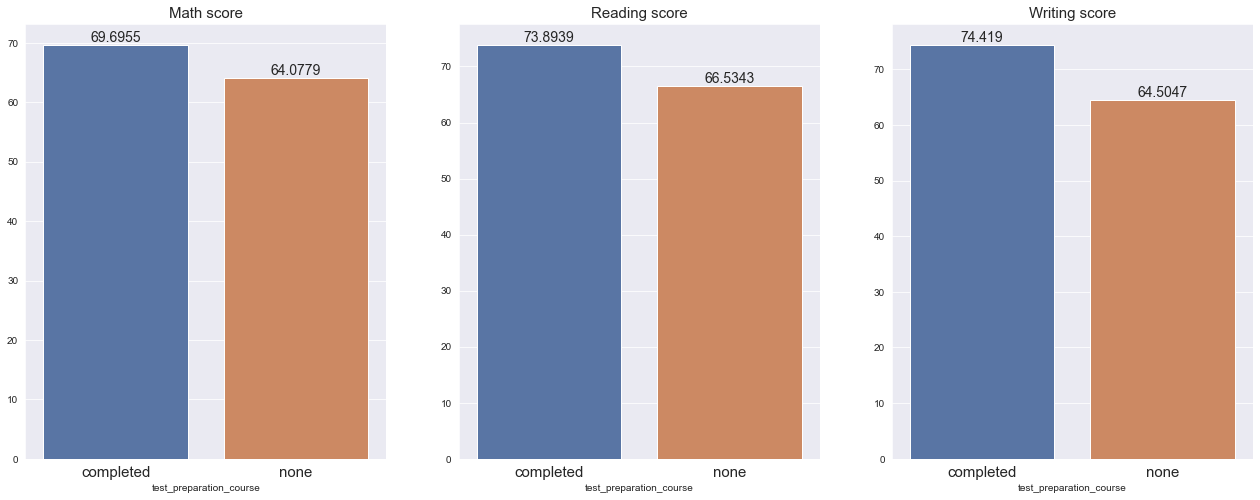

In [37]:
df5 = df.groupby('test_preparation_course')

f, ax = plt.subplots(1, 3,figsize=(22,8))
sns.barplot(x=df5['math_score'].mean().index, y=df5['math_score'].mean().values, ax=ax[0])
ax[0].set_title('Math score', size=15)
ax[0].tick_params(axis='x', labelsize=15)

for container in ax[0].containers:
    ax[0].bar_label(container, size=14)

sns.barplot(x=df5['reading_score'].mean().index, y=df5['reading_score'].mean().values, ax=ax[1])
ax[1].set_title('Reading score', size=15)
ax[1].tick_params(axis='x', labelsize=15)

for container in ax[1].containers:
    ax[1].bar_label(container, size=14)

sns.barplot(x=df5['writing_score'].mean().index, y=df5['writing_score'].mean().values, ax=ax[2])
ax[2].set_title('Writing score', size=15)
ax[2].tick_params(axis='x', labelsize=15)

for container in ax[2].containers:
    ax[2].bar_label(container, size=14)

As usual, students who completed test preparation courses have high test scores.

## Multivariate Analysis

### Gender vs race/ethnicity

In [38]:
df.groupby(['gender', 'race/ethnicity'])[
    ['math_score', 'reading_score', 'writing_score']].mean()

math_score  reading_score  writing_score
gender race/ethnicity                                          
female group A          58.527778      69.000000      67.861111
       group B          61.403846      71.076923      70.048077
       group C          62.033333      71.944444      71.777778
       group D          65.248062      74.046512      75.023256
       group E          70.811594      75.840580      75.536232
male   group A          63.735849      61.735849      59.150943
       group B          65.930233      62.848837      60.220930
       group C          67.611511      65.424460      62.712230
       group D          69.413534      66.135338      65.413534
       group E          76.746479      70.295775      67.394366

Male students in Group E have the highest average score in math (76.75). Females from E and D groups also achieved high results in reading and writing.

### Gender vs test_preparation_course

In [39]:
df.groupby(['gender', 'test_preparation_course'])[
    ['math_score', 'reading_score', 'writing_score']].mean().sort_values(
    by='test_preparation_course')

,,math_score,reading_score,writing_score
gender,test_preparation_course,,,
female,completed,67.195652,77.375000,78.793478
male,completed,72.339080,70.212644,69.793103
female,none,61.670659,69.982036,68.982036
male,none,66.688312,62.795455,59.649351


Female students who completed test preparations have the highest average score in writing (78.79). It's the best result in all subjects!

### Gender vs parental_level_of_education

In [40]:
df.groupby(['gender', 'parental_level_of_education'])[
    ['math_score', 'reading_score', 'writing_score']].mean().sort_values(
    by='parental_level_of_education')

,,math_score,reading_score,writing_score
gender,parental_level_of_education,,,
female,associate's degree,65.250000,74.120690,74.000000
male,associate's degree,70.764151,67.433962,65.405660
female,bachelor's degree,68.349206,77.285714,78.380952
male,bachelor's degree,70.581818,68.090909,67.654545
female,high school,59.351064,68.202128,66.691489
male,high school,64.705882,61.480392,58.539216
female,master's degree,66.500000,76.805556,77.638889
male,master's degree,74.826087,73.130435,72.608696
female,some college,65.406780,73.550847,74.050847


Children of parents with master's and bachelor's degrees earned more scores than other groups of students. The lower the education level of parents, the lower the test scores of their children.

### Race/ethnicity vs parental_level_of_education

In [41]:
pd.DataFrame(df[['race/ethnicity', 'parental_level_of_education']].value_counts().sort_index())

0
race/ethnicity parental_level_of_education    
group A        associate's degree           14
               bachelor's degree            12
               high school                  18
               master's degree               3
               some college                 18
               some high school             24
group B        associate's degree           41
               bachelor's degree            20
               high school                  48
               master's degree               6
               some college                 37
               some high school             38
group C        associate's degree           78
               bachelor's degree            40
               high school                  64
               master's degree              19
               some college                 69
               some high school             49
group D        associate's degree           50
               bachelor's degree            28
               high school                  44
               master's degree              23
               some college                 67
               some high school             50
group E        associate's degree           39
               bachelor's degree            18
               high school                  22
               master's degree               8
               some college                 35
               some high school             18

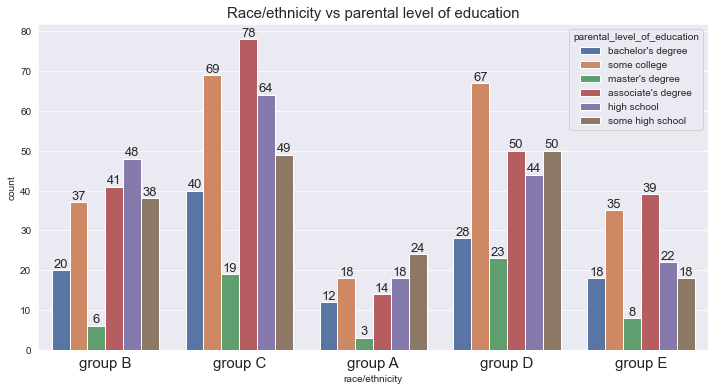

In [42]:
f, ax = plt.subplots(1,1,figsize=(12, 6))
sns.countplot(x=df['race/ethnicity'], data=df, hue='parental_level_of_education')
ax.set_title('Race/ethnicity vs parental level of education', size=15)
ax.tick_params(axis='x', labelsize=15)
for container in ax.containers:
    ax.bar_label(container, size=13)

In Group C, mostly educated parents — 59 of them have bachelor's and master's degrees. However, the best academic performance is found in Group E students.

### Correlation

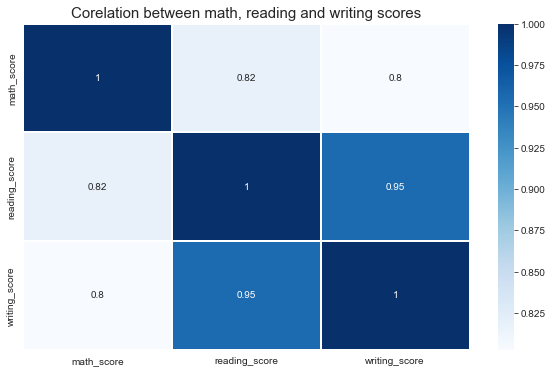

In [43]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='Blues', linewidths=0.1)
plt.title('Corelation between math, reading and writing scores', size=15);

There is a certain correlation between all these subjects here. However, reading and writing scores are highly correlated.

## Conclusion

* This data set consists of the marks secured by US high school students in various subjects.
* We try to know which factors may affect the student's performance, such as parental educational background, test preparation, etc.
* The total number of records in the dataset is 1000. Columns in the dataset equal 8. There are no missing or duplicated values.
* The number of female students is slightly higher than that of male students: 518 (51.8%) and 482 (48.2%), respectively.
* Students are divided into five groups by race or ethnicity. Groups C (319 students) and D (262 students) are the biggest groups, while Group A (89) has the smallest number of representatives.
* Education level of parents: 6 groups, beginning from high school degree up to master's degree. Only 17.7% of parents have a bachelor's or master's degree.
* Most students (64.5%) have a standard packed lunch. And students with a standard lunch pack have better performance.
* Unfortunately, only 35.8% of students completed test preparation.
* The math score is skewed to the left and has some outliers. The average math score is 66.09 and the median is 66, which means they are almost equal.
* The writing score is skewed to the left and, as usual, has some outliers. The average writing score is 68.05. The standard deviation is 15.20, which means there is a relatively small spread of values away from the mean.
* The study shows female students are better in reading (an average score of 72.61) and writing (72.47), while male students have better performance in math (68.73). As you know, many male students are more inclined towards the sciences and female students are towards the humanities.
* Group E is the best group in all subjects: math - 73.82, reading - 73.03, and writing - 71.41. Students from Group A have the worst performance. However, both groups are the smallest groups in the dataset, with 140 and 89 students, respectively.
* As the proverb says, the apple never falls far from the tree. Children of parents with master's degrees have the highest average scores in reading and writing! But this group has 59 students only.
* As usual, students who completed test preparation courses have high test scores.
* Male students in Group E have the highest average score in math (76.75). Female students who completed test preparations have the highest average score in writing (78.79). It's the best result in all subjects!
* Children of parents with master's and bachelor's degrees earned more scores than other groups of students. The lower the education level of parents, the lower the test scores of their children.
* There is a certain correlation between all these subjects here. However, reading and writing scores are highly correlated.
* **According to the study, students whose parents have a bachelor's and a master's degree, who are originally from Group E ethnicity, who completed test preparation courses, and who ate a standard lunch have the best academic performances.**

You can find the source files on my GitHub Repo along with other samples of my work: https://github.com/nurshams